In [66]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [68]:
from scipy.stats import linregress

In [69]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [70]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [71]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [72]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [73]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [74]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | thongwa
Processing Record 6 of Set 1 | sabha
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | santa isabel do rio negro
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | podosinovets
Processing Record 12 of Set 1 | samusu
City not found. Skipping...
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | port hardy
Processing Record 15 of Set 1 | havoysund
Processing Record 16 of Set 1 | luanda
Processing Record 17 of Set 1 | luganville
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | vestmannaeyjar
P

Processing Record 34 of Set 4 | klaksvik
Processing Record 35 of Set 4 | norman wells
Processing Record 36 of Set 4 | sisimiut
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | balsas
Processing Record 41 of Set 4 | hay river
Processing Record 42 of Set 4 | auki
Processing Record 43 of Set 4 | kapit
Processing Record 44 of Set 4 | sampit
Processing Record 45 of Set 4 | san policarpo
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | charlestown
Processing Record 48 of Set 4 | bambanglipuro
Processing Record 49 of Set 4 | kontagora
Processing Record 50 of Set 4 | greeley
Processing Record 1 of Set 5 | havelock
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | morondava
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | maceio
Processing Record 6 of Set 5 | katiola


Processing Record 19 of Set 8 | morant bay
Processing Record 20 of Set 8 | tayshet
Processing Record 21 of Set 8 | komsomolskiy
Processing Record 22 of Set 8 | takoradi
Processing Record 23 of Set 8 | hazorasp
Processing Record 24 of Set 8 | aksu
Processing Record 25 of Set 8 | port lincoln
Processing Record 26 of Set 8 | bargal
City not found. Skipping...
Processing Record 27 of Set 8 | boffa
Processing Record 28 of Set 8 | manggar
Processing Record 29 of Set 8 | aklavik
Processing Record 30 of Set 8 | petauke
Processing Record 31 of Set 8 | vysokogornyy
Processing Record 32 of Set 8 | perth
Processing Record 33 of Set 8 | tomatlan
Processing Record 34 of Set 8 | katsuura
Processing Record 35 of Set 8 | garden city
Processing Record 36 of Set 8 | kashi
City not found. Skipping...
Processing Record 37 of Set 8 | rawson
Processing Record 38 of Set 8 | adre
Processing Record 39 of Set 8 | senador guiomard
Processing Record 40 of Set 8 | teya
Processing Record 41 of Set 8 | chauk
Processi

Processing Record 3 of Set 12 | los llanos de aridane
Processing Record 4 of Set 12 | ouadda
Processing Record 5 of Set 12 | waingapu
Processing Record 6 of Set 12 | faaborg
Processing Record 7 of Set 12 | bayan
Processing Record 8 of Set 12 | doctor arroyo
Processing Record 9 of Set 12 | leiyang
Processing Record 10 of Set 12 | hasaki
Processing Record 11 of Set 12 | banda aceh
Processing Record 12 of Set 12 | atherton
Processing Record 13 of Set 12 | meulaboh
Processing Record 14 of Set 12 | west wendover
Processing Record 15 of Set 12 | bagdarin
Processing Record 16 of Set 12 | martorell
Processing Record 17 of Set 12 | bay-khaak
Processing Record 18 of Set 12 | lemon tree passage
Processing Record 19 of Set 12 | coquimbo
Processing Record 20 of Set 12 | tanete
Processing Record 21 of Set 12 | chandbali
Processing Record 22 of Set 12 | fayaoue
Processing Record 23 of Set 12 | honningsvag
Processing Record 24 of Set 12 | severnyy
City not found. Skipping...
Processing Record 25 of Se

In [75]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,39.31,-74.98,54.00,52,1,4.03,US,2019-11-06 22:25:36
1,Ushuaia,-54.81,-68.31,33.80,95,90,24.16,AR,2019-11-06 22:25:36
2,Arraial Do Cabo,-22.97,-42.02,75.20,83,75,9.17,BR,2019-11-06 22:25:36
3,Dikson,73.51,80.55,-10.13,93,0,13.24,RU,2019-11-06 22:25:37
4,Thongwa,16.76,96.52,77.00,100,75,3.36,MM,2019-11-06 22:25:37
5,Sabha,27.03,14.43,78.33,18,0,8.32,LY,2019-11-06 22:25:37
6,Vila Franca Do Campo,37.72,-25.43,62.60,72,75,4.70,PT,2019-11-06 22:25:37
7,Santa Isabel Do Rio Negro,-0.41,-65.02,85.24,70,58,4.65,BR,2019-11-06 22:25:37
8,Upernavik,72.79,-56.15,22.91,95,100,5.91,GL,2019-11-06 22:25:38
9,Mataura,-46.19,168.86,56.88,84,100,1.32,NZ,2019-11-06 22:25:38


In [76]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [77]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,US,2019-11-06 22:25:36,39.31,-74.98,54.00,52,1,4.03
1,Ushuaia,AR,2019-11-06 22:25:36,-54.81,-68.31,33.80,95,90,24.16
2,Arraial Do Cabo,BR,2019-11-06 22:25:36,-22.97,-42.02,75.20,83,75,9.17
3,Dikson,RU,2019-11-06 22:25:37,73.51,80.55,-10.13,93,0,13.24
4,Thongwa,MM,2019-11-06 22:25:37,16.76,96.52,77.00,100,75,3.36
5,Sabha,LY,2019-11-06 22:25:37,27.03,14.43,78.33,18,0,8.32
6,Vila Franca Do Campo,PT,2019-11-06 22:25:37,37.72,-25.43,62.60,72,75,4.70
7,Santa Isabel Do Rio Negro,BR,2019-11-06 22:25:37,-0.41,-65.02,85.24,70,58,4.65
8,Upernavik,GL,2019-11-06 22:25:38,72.79,-56.15,22.91,95,100,5.91
9,Mataura,NZ,2019-11-06 22:25:38,-46.19,168.86,56.88,84,100,1.32


In [78]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [79]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

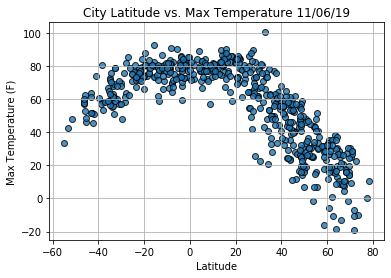

In [80]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

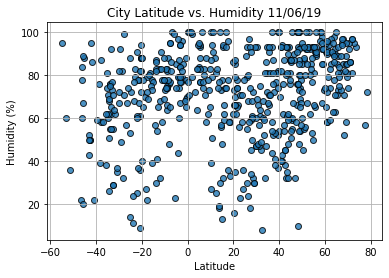

In [81]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

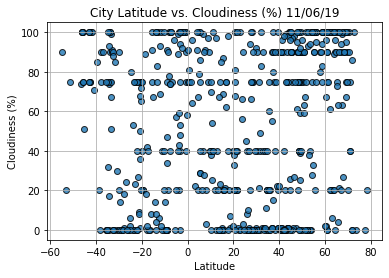

In [82]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

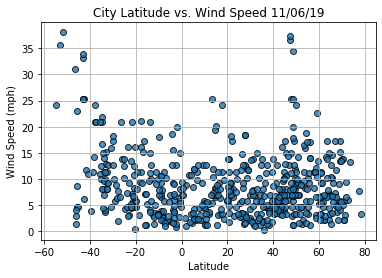

In [83]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [84]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [85]:
index13 = city_data_df.loc[13]
index13

City                    Havoysund
Country                        NO
Date          2019-11-06 22:25:39
Lat                            71
Lng                         24.66
Max Temp                     28.4
Humidity                       86
Cloudiness                     40
Wind Speed                   2.24
Name: 13, dtype: object

In [86]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,US,2019-11-06 22:25:36,39.31,-74.98,54.00,52,1,4.03
3,Dikson,RU,2019-11-06 22:25:37,73.51,80.55,-10.13,93,0,13.24
4,Thongwa,MM,2019-11-06 22:25:37,16.76,96.52,77.00,100,75,3.36
5,Sabha,LY,2019-11-06 22:25:37,27.03,14.43,78.33,18,0,8.32
6,Vila Franca Do Campo,PT,2019-11-06 22:25:37,37.72,-25.43,62.60,72,75,4.70


In [87]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

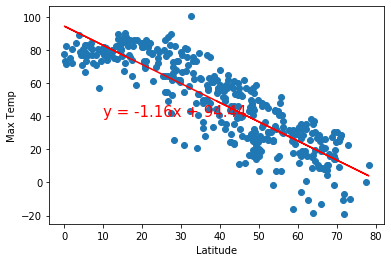

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      '''Linear Regression on the Northern Hemisphere
for Maximum Temperature''', 'Max Temp',(10,40))

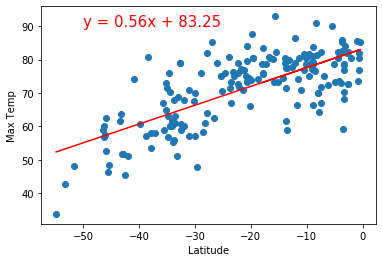

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
                        for Maximum Temperature''', 'Max Temp',(-50,90))

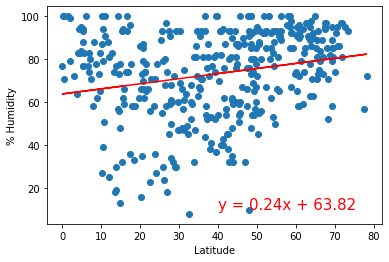

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere
                        for % Humidity''', '% Humidity',(40,10))

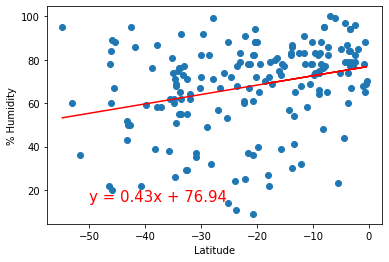

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
                        for % Humidity''', '% Humidity',(-50,15))

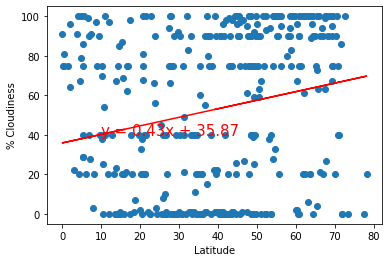

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      '''Linear Regression on the Northern Hemisphere
for % Cloudiness''', '% Cloudiness',(10,40))

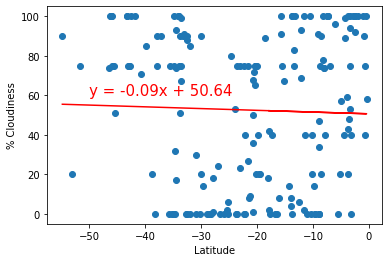

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
                        for % Cloudiness''', '% Cloudiness',(-50,60))

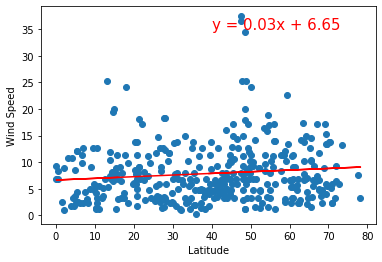

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere
                        for Wind Speed''', 'Wind Speed',(40,35))